### Guided Practice: Logit Function and Odds

In [2]:
def logit_func(odds):
    # uses a float (odds) and returns back the log odds (logit)
    return None

def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return None

odds_set = [
    5./1,
    20./1,
    1.1/1,
    1.8/1,
    1.6/1
]

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [17]:
lm = LogisticRegression()

df = pd.read_csv('/Users/vvnikitin/Desktop/admissions.csv')

In [11]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [19]:
df = df.join(pd.get_dummies(df['rank']))

KeyError: 'rank'

In [17]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [11]:
lm.fit(df['gre', 'gpa', 1, 2, 3], df['admit'])

KeyError: ('gre', 'gpa', 1, 2, 3)

In [13]:
import numpy as np

In [29]:
print lm.coef_
print lm.intercept_
print df.admit.mean()

[[  1.63913356e-03   4.33354115e-04   1.15220976e+00   5.14395667e-01
   -3.62326171e-02]]
[ 0.12329791]
0.3175


Below is some code to walk through confusion matrices. It'll be useful for working through the Titanic problem.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

Below the ROC curve is based on various thresholds: it shows with a false positive rate (x-axis) ~0, it also expects a true positive rate (y-axis) ~0 (the same, ish, for the top right hand of the figure).

The second chart, which does not play with thesholds, shows the one true TPR and FPR point, joined to 0,0 and 1,1.

The first chart will be more effective as you compare models and determine where the decision line should exist for the data. The second simplifies the first in case this idea of thresholds is confusing.

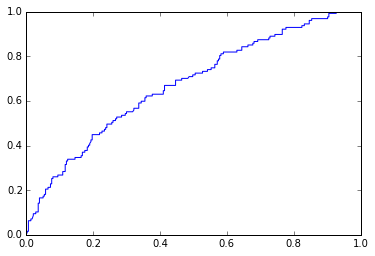

In [75]:
actuals = lm.predict(feature_set) 
probas = lm.predict_proba(feature_set)
plt.plot(roc_curve(df[['admit']], probas[:,1])[0], roc_curve(df[['admit']], probas[:,1])[1])

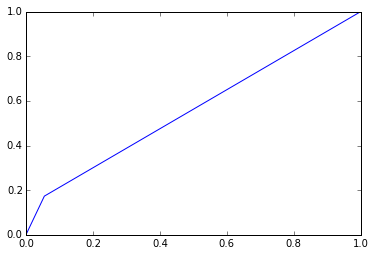

In [71]:
plt.plot(roc_curve(df[['admit']], actuals)[0], roc_curve(df[['admit']], actuals)[1])

Finally, you can use the `roc_auc_score` function to calculate the area under these curves (AUC).

In [72]:
roc_auc_score(df['admit'], lm.predict(feature_set)

0.55914164575581893

### Titanic Problem

** Goals **

1. Spend a few minutes determining which data would be most important to use in the prediction problem. You may need to create new features based on the data available. Consider using a feature selection aide in sklearn. But a worst case scenario; identify one or two strong features that would be useful to include in the model.
2. Spend 1-2 minutes considering which _metric_ makes the most sense to optimize. Accuracy? FPR or TPR? AUC? Given the business problem (understanding survival rate aboard the Titanic), why should you use this metric?
3. Build a tuned Logistic model. Be prepared to explain your design (including regularization), metric, and feature set in predicting survival using the tools necessary (such as a fit chart).

In [14]:
titanic_data = pd.read_csv('/Users/vvnikitin/Desktop/titanic.csv')


In [48]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
model_data.Age = model_data.Age.fillna(method='bfill')

In [41]:
cols_to_keep =['Survived', 'Pclass', 'Sex','Age', 'SibSp', 'Parch']
model_data = titanic_data[cols_to_keep].copy()
print model_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64


ValueError: max must be larger than min in range parameter.

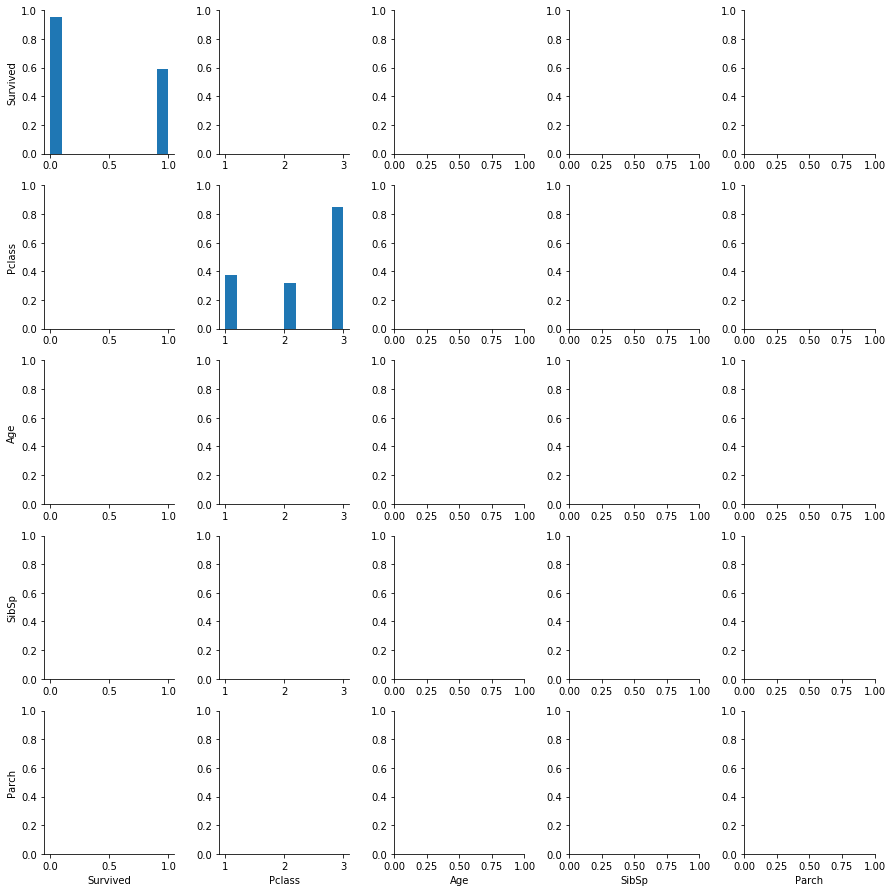

In [42]:
import seaborn as sns
sns.pairplot(titanic_data[cols_to_keep])

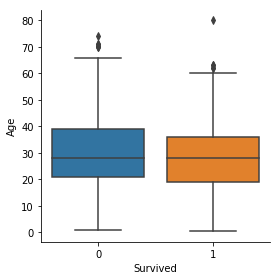

In [47]:
sns.factorplot(kind = 'box', data=model_data, x = "Survived", y = 'Age')

In [56]:
model_data['isSibling'] = model_data['SibSp'].apply(lambda x: int(x>0))
model_data['isChild'] = model_data['Parch'].apply(lambda x: int(x>0))
pd.get_dummies(data = model_data, columns = ['Sex',"Pclass"], drop_first=True)

,Survived,Age,SibSp,Parch,isSibling,isChild,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,1,0,1,0,1
1,1,38.0,1,0,1,0,0,0,0
2,1,26.0,0,0,0,0,0,0,1
3,1,35.0,1,0,1,0,0,0,0
4,0,35.0,0,0,0,0,1,0,1
5,0,54.0,0,0,0,0,1,0,1
6,0,54.0,0,0,0,0,1,0,0
7,0,2.0,3,1,1,1,1,0,1
8,1,27.0,0,2,0,1,0,0,1
9,1,14.0,1,0,1,0,0,1,0


,Survived,Pclass,Sex,Age,SibSp,Parch,isSibling,isChild
0,0,3,male,22.0,1,0,1,0
1,1,1,female,38.0,1,0,1,0
2,1,3,female,26.0,0,0,0,0
3,1,1,female,35.0,1,0,1,0
4,0,3,male,35.0,0,0,0,0


In [58]:
feature_to_use = ['Age', 'isSibling', 'isChild', 'Sex_male', 'Pclass_2', 'Pclass_3']
X = model_data[feature_to_use]
y = model_data.Survived

KeyError: "['Sex_male' 'Pclass_2' 'Pclass_3'] not in index"

In [60]:
lm = LogisticRegression()
lm.fit(X,y)

NameError: name 'X' is not defined

In [ ]:
print lm.score(X,y)


In [ ]:
probas = 